<a href="https://colab.research.google.com/github/vaniamusdani/vaniamusdani.github.io/blob/main/Case%20Study%20Association%20Rule%20Group%20F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP F



1.   Muhammad Rangga Buwana/1906376640
2.   Gaby Fionna/1906375650
3. Hafsa Khaerunisa/1906354173
4. Sanjung Maharani/1906354210
5. Angelina Putri/2006464152
6. Vania Putri/1906377706
7. Caroline Woenarso/1906375663


# Problem Statement


##**AlfaIndo**
*   AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di
kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan.
*   Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan.

*   Objective dari penelitian ini adalah  untuk membantu toko AlfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

# Main Focus



*   Bagaimana cara meningkatkan profit dari AlfaIndo cabang UI Depok?
*   Apakah barang-barang yang dijual di AlfaIndo cabang UI Depok memiliki asosiasi antara satu sama lain?
*   Apa saja barang-barang yang memiliki asosiasi tersebut?
*   Apakah barang-barang yang memiliki asosiasi tersebut dapat membantu untuk meningkatkan profit dari AlfaIndo cabang UI Depok?





# Module


In [ ]:
# install module
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend
    !pip install pycaret
except:
    print("Running the code locally, make sure to install required modules.") #IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Set


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *
import warnings

%matplotlib inline
plt.style.use('bmh'); sns.set()
warnings.filterwarnings('ignore')

# Import Data Set from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/carolwoenarso/Case03-DataMining/main/Data_CaseStudy03.csv')
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022 0:00,Mr. A,1.0,Roti,Sri Roti,2
1,1,7/1/2022 0:00,Mr. A,2.0,Air Minum,Aquos,1
2,1,7/1/2022 0:00,Mr. A,11.0,Mie Instan,Indomi,2
3,1,7/1/2022 0:00,Mr. A,12.0,Mie Instan,Mi Sedap,1
4,2,7/1/2022 0:00,Mr. B,2.0,Air Minum,Aquos,1
5,2,7/1/2022 0:00,Mr. B,6.0,Snack,Chiki,2
6,2,7/1/2022 0:00,Mr. B,3.0,Roti,Prambanan,1
7,2,7/1/2022 0:00,Mr. B,5.0,Shampoo,Clean,1
8,3,7/2/2022 0:00,Mr. C,4.0,Sabun,Lifboy,1
9,3,7/2/2022 0:00,Mr. C,5.0,Shampoo,Clean,1


# Data Pre-Processing

Data pre-processing pertama-tama dilakukan dengan menggunakan excel.


*   File yang didapatkan berformat excel dan terdapat cell kosong dalam
kolom 'ID Transaksi', 'Tanggal', dan 'Konsumen'. Hal ini dikarenakan format pencatatan data yang hanya menuliskan 1 'ID Transaksi' dalam row awal item pembelian. Akhirnya untuk pembetulan data, kami memutuskan untuk mengisi cell-cell kosong tersebut dengan value 'ID Transaksi', 'Tanggal', dan 'Konsumen' yang terdapat di atasnya.
*   Pada 'ID Produk' masih terdapat perbedaan format penulisan. Oleh karena itu, format penulisan angka dari 'ID Produk' dibetulkan menggunakan excel.

*   Data pre-processing lainnya akan dilakukan berikutnya dengan coding di bawah.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  56 non-null     int64  
 1   Tanggal       56 non-null     object 
 2   Konsumen      56 non-null     object 
 3   ID Produk     56 non-null     float64
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB




*  'ID Transaksi' memiliki tipe data integer yang mana
seharusnya berupa object. Oleh karena itu, tipe data dari 'ID Transaksi' akan diubah menjadi object.
*   'ID Produk' memiliki tipe data float yang mana seharusnya berupa object. Oleh karena itu, tipe data dari 'ID Produk' akan diubah menjadi object.

In [ ]:
df['ID Transaksi'] = df['ID Transaksi'].astype('str')
df['ID Produk'] = df['ID Produk'].astype('int64')
df['ID Produk'] = df['ID Produk'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     object
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     object
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.2+ KB


Dengan demikian, berikut data yang digunakan dalam analisis.

In [ ]:
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,1,7/1/2022 0:00,Mr. A,2,Air Minum,Aquos,1
2,1,7/1/2022 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1,7/1/2022 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1


# Notes for AlfaIndo

Akan dilakukan Market Basket Analysis (MBA) untuk melihat apakah barang-barang yang dijual di AlfaIndo cabang UI Depok memiliki asosiasi antara satu sama lain. Jika ada, apa saja barang-barang tersebut dan actionable action yang dapat dilakukan oleh AlfaIndo cabang UI Depok untuk meningkatkan profitnya pasca masa pandemi.

## EDA

Akan dilakukan EDA terhadap data transaksi dari AlfaIndo cabang UI Depok.

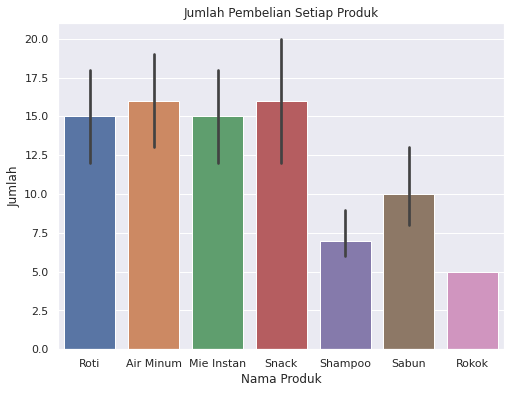

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Nama Produk', y='Jumlah', estimator = np.sum)

plt.title("Jumlah Pembelian Setiap Produk")
plt.show()

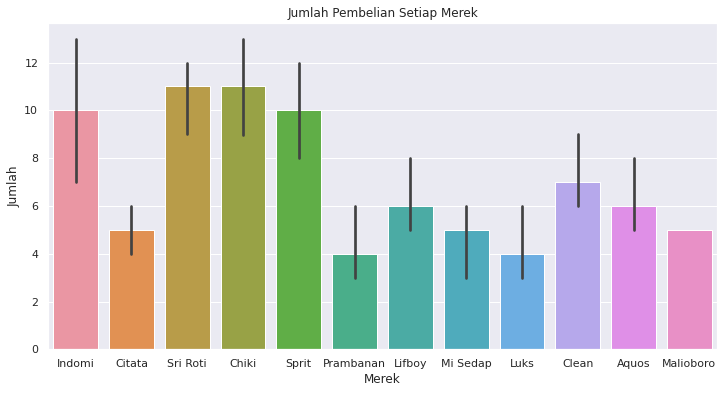

In [ ]:
plt.figure(figsize=(12,6))
df_ = df.sort_values(by='Jumlah', ascending=False)
sns.barplot(data=df_, x='Merek', y='Jumlah', estimator=np.sum)

plt.title("Jumlah Pembelian Setiap Merek")
plt.show()

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal']).dt.day_name()
df.rename(columns={'Tanggal':'Hari'}, inplace=True)
df.head()

,ID Transaksi,Hari,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,Friday,Mr. A,1,Roti,Sri Roti,2
1,1,Friday,Mr. A,2,Air Minum,Aquos,1
2,1,Friday,Mr. A,11,Mie Instan,Indomi,2
3,1,Friday,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,Friday,Mr. B,2,Air Minum,Aquos,1


In [ ]:
df_hari = df.groupby(['Merek','Hari'], as_index=False).agg({'Jumlah':'sum'})
df_hari

,Merek,Hari,Jumlah
0,Aquos,Friday,2
1,Aquos,Monday,1
2,Aquos,Tuesday,3
3,Chiki,Friday,2
4,Chiki,Monday,3
5,Chiki,Sunday,1
6,Chiki,Thursday,1
7,Chiki,Tuesday,4
8,Citata,Saturday,3
9,Citata,Thursday,2


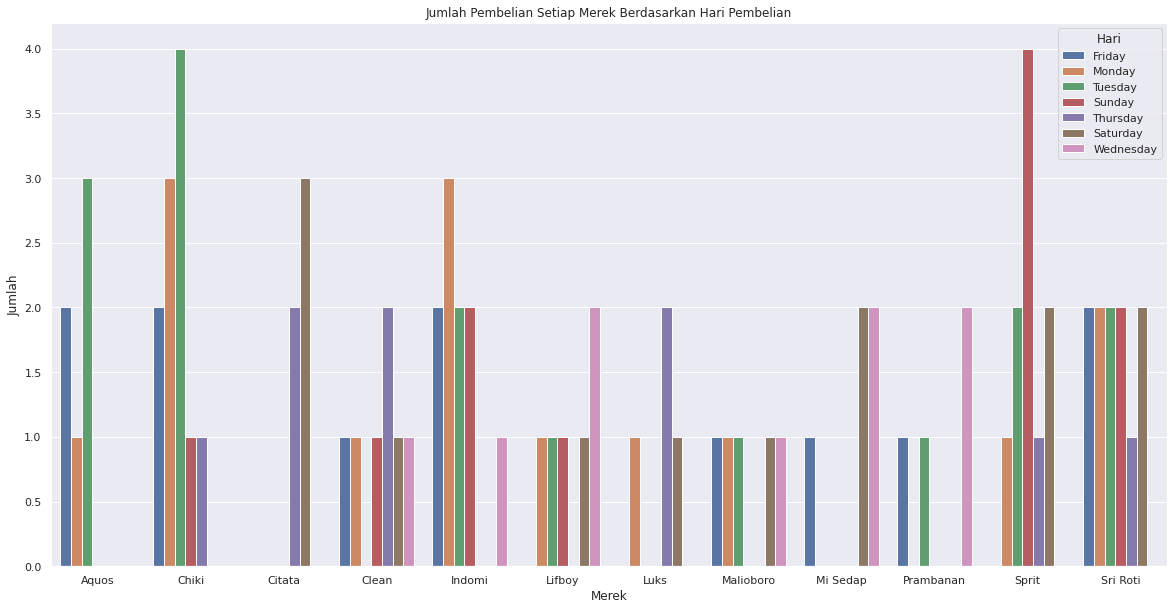

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_hari, x='Merek', y='Jumlah', hue = 'Hari')

plt.title("Jumlah Pembelian Setiap Merek Berdasarkan Hari Pembelian")
plt.show()

Berdasarkan EDA, terlihat bahwa produk bernama 'Sri Roti' yang merupakan jenis produk 'Roti' dan produk bernama 'Chiki' yang merupakan jenis produk 'Snack' memiliki penjualan yang tinggi. Sementara itu, produk bernama 'Prambanan' yang merupakan jenis produk 'Roti' dan produk bernama 'Citata' yang merupakan jenis produk 'Snack' memiliki penjualan yang cukup rendah. Produk ini dapat dilakukan cross-selling, yakni dengan memasangkan produk berjenis 'Roti' dengan penjualan yang tinggi dengan produk berjenis 'Snack' dengan penjualan yang rendah dan sebaliknya: 'Sri Roti' dan 'Citata' & 'Prambanan' dan 'Chiki'.

Kedua promo bundling tersebut dapat dilakukan di periode waktu berbeda (tidak secara bersamaan, bergantung pada hari lakunya produk penjualan yang bersangkutan). Untuk bundling 'Sri Roti' dan 'Citata' dapat dilakukan pada hari Sabtu dikarenakan penjualan 'Citata' yang tinggi pada hari tersebut dan dapat meningkatkan juga penjualan 'Sri Roti' yang lebih rendah pada hari tersebut. Kemudian untuk bundling 'Prambanan' dan 'Chiki' dapat dilakukan pada hari Selasa dengan alasan serupa.

Promo bundling ini dinilai dapat menarik para customer yang umumnya adalah mahasiswa UI Depok untuk membeli promo bundling dengan harga yang lebih murah.


## Market Basket Analysis (MBA)

Akan dilakukan analisis Market Basket dari AlfaIndo cabang UI Depok.

In [ ]:
basket = df.groupby(['ID Transaksi', 'Merek'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
12,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
13,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
10,0,1,0,0,0,0,0,0,0,1,1,0
11,0,0,0,0,0,0,0,1,0,1,0,0
12,0,0,0,1,1,1,0,0,1,0,0,0
13,0,0,1,0,0,0,0,0,0,0,1,1


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Clean, Chiki)"
28,0.166667,"(Lifboy, Indomi)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Lifboy, Aquos)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
96,"(Sri Roti, Chiki)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
27,(Citata),"(Sri Roti, Sprit)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
22,"(Sri Roti, Sprit)",(Citata),0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
99,"(Aquos, Chiki)","(Sri Roti, Lifboy)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667


In [ ]:
# Filtering
rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Lifboy, Aquos)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
96,"(Sri Roti, Chiki)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
27,(Citata),"(Sri Roti, Sprit)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
98,"(Lifboy, Chiki)","(Sri Roti, Aquos)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
94,"(Sri Roti, Lifboy)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
41,"(Sri Roti, Indomi)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
91,"(Sri Roti, Lifboy, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
92,"(Sri Roti, Aquos, Chiki)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
53,"(Lifboy, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
47,"(Sri Roti, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf


*   Berdasarkan MBA, terlihat bahwa customer/pelanggan yang membeli produk bernama 'Sri Roti' bersamaan dengan 'Chiki' memiliki kecenderungan untuk juga membeli produk bernama 'Lifboy' dan 'Aquos' secara bersamaan dan berlaku sebaliknya. Oleh karena itu, AlfaIndo cabang UI Depok dapat melakukan hal berikut:
1.   Memposisikan produk 'Sri Roti dan 'Chiki' secara berdekatan dan dapat diletakan di depan pintu masuk dari AlfaIndo.
2.   Memposisikan produk 'Lifboy' dan 'Aquos' secara berdekatan, namun peletakannya perlu dibuat agak jauh dari 'Sri Roti' dan 'Chiki', mungkin di posisi paling kiri/kanan dari ruangan, agar customer/pelanggan dapat berkeliling dan melihat sebagian besar barang yang ditawarkan di AlfaIndo cabang UI Depok.

*   Kemudian, berdasarkan MBA juga terlihat bahwa customer/pelanggan yang membeli berbagai produk juga memiliki kecenderungan untuk berujung membeli produk bernama 'Aquos'. Oleh karena itu, produk bernama 'Aquos' dapat diletakan di dekat kasir. Selain itu, petugas kasir diberikan SOP untuk menawarkan produk 'Aquos' saat sebelum memproses pembayaran.

*   Produk bernama 'Citata' dan 'Sprit' memiliki asosiasi. Oleh karena itu peletakan produk 'Citata' dan 'Sprit' perlu dipertimbangkan. Posisi produk 'Citata' dan 'Sprit' dapat dibuat lebih dekat. Selain itu, dengan mempertimbangkan flow arus bergerak pelanggan sedari masuk pintu AlfaIndo hingga ke kasir dapat dipertimbangkan untuk menaruh 'Citata' agar terlihat lebih dahulu dan saat pelanggan mulai mengarah ke kasir, produk 'Sprit' harus terlihat oleh pelanggan.






# Kesimpulan

Actionable Action AlfaIndo cabang UI Depok


*   Membuat promo bundling untuk produk-produk berikut: Sri Roti dan Citata pada hari Sabtu; Prambanan dan Chiki pada hari Selasa.


*   Memposisikan produk 'Sri Roti dan 'Chiki' secara berdekatan dan dapat diletakan di depan pintu masuk dari AlfaIndo.
*   Memposisikan produk 'Lifboy' dan 'Aquos' secara berdekatan, namun peletakannya perlu dibuat agak jauh dari 'Sri Roti' dan 'Chiki' agar customer/pelanggan dapat berkeliling dan melihat sebagian besar barang yang ditawarkan di AlfaIndo cabang UI Depok.
*   Posisi produk 'Citata' dan 'Sprit' dapat dibuat lebih dekat. Selain itu, dengan mempertimbangkan flow arus bergerak pelanggan sedari masuk pintu AlfaIndo hingga ke kasir dapat dipertimbangkan untuk menaruh 'Citata' agar terlihat lebih dahulu dan saat pelanggan mulai mengarah ke kasir, produk 'Sprit' harus terlihat oleh pelanggan.





# Recommendation



*   Membuat tipe data dari masing-masing variabel konsisten.
*   Untuk tabel transaksi dapat ditambahkan kolom atau variabel 'Total Pembelian' agar dapat dihitung pula pendapatan dari AlfaIndo cabang UI Depok.
*   Untuk analisis berikutnya, dapat dicari pula harga barang milik kompetitor melalui observasi lapangan agar dapat menentukan harga barang/produk yang bersaing (competitor analysis).


